# PCA on MNIST

This notebook plays around with Principal Component Analysis on the MNIST dataset.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

import torch
from torchvision import datasets, transforms

We load MNIST and display some examples.

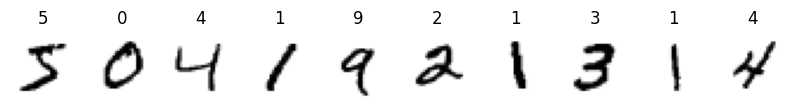

In [6]:
dataset = datasets.MNIST('./data', transform=transforms.ToTensor(), download=True)
images = dataset.data.numpy()
labels = dataset.targets.numpy()

pltsize=1
plt.figure(figsize=(10 * pltsize, pltsize * 1.1))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(images[i].reshape(28,28), cmap="gray_r")
    plt.title(labels[i])
plt.show()

Let us plot the first PCA components as images. We recognize pieces of digits, which is expected as the principal components allow to reconstruct efficiently the dataset.

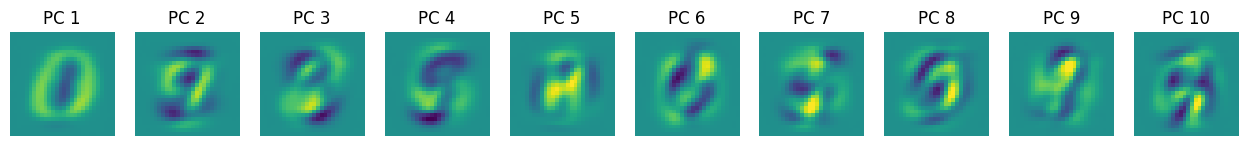

In [23]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(images.reshape(-1, 28 * 28))
fig = plt.figure(figsize=(n_components * np.power(n_components, 1 / 5), 3))
axes = []
for i in range(n_components):
    ax_ = fig.add_subplot(1, n_components, i + 1)
    ax_.imshow(pca.components_[i].reshape(28, 28), interpolation='nearest', clim=(-.15, .15))
    ax_.set_title(f'PC {i + 1}')
    ax_.axis('off')

    axes.append(ax_)

We can also plot the dataset in 2D with a 2D PCA, with a different color for each class. We observe clusters, even if they are not very well-separated.

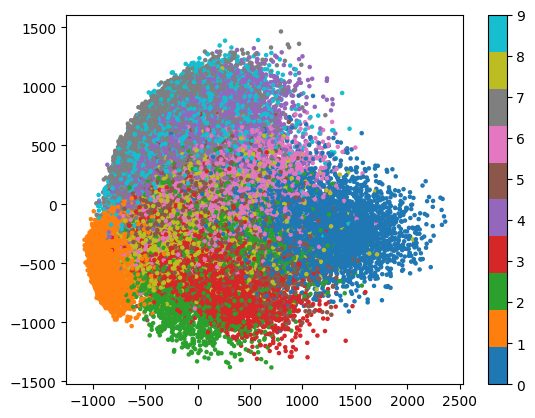

In [24]:
# plot PCA of images in 2D
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(images.reshape(-1, 28 * 28))
X = pca.transform(images.reshape(-1, 28 * 28))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.tab10, s=5)
plt.colorbar()
plt.show()

Let us do the same thing in 3D.

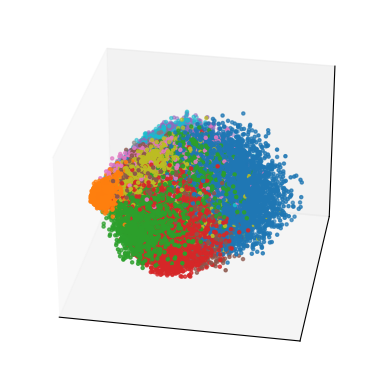

In [43]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(images.reshape(-1, 28 * 28))
X = pca.transform(images.reshape(-1, 28 * 28))
fig = plt.figure()
ax = fig.add_subplot(projection='3d', elev=30, azim=-80)  # change the value of azim to turn the image
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=cm.tab10, s=5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()

Finally, let us reconstruct an image from the first components of its PCA. The more components we take, the better the reconstruction is.

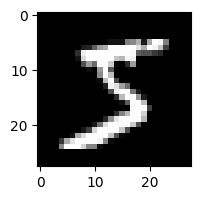

In [38]:
# plot of the original image
im = images[0].reshape(28, 28)
fig = plt.figure(figsize=(2, 2))
plt.imshow(im, cmap='gray')
plt.show()

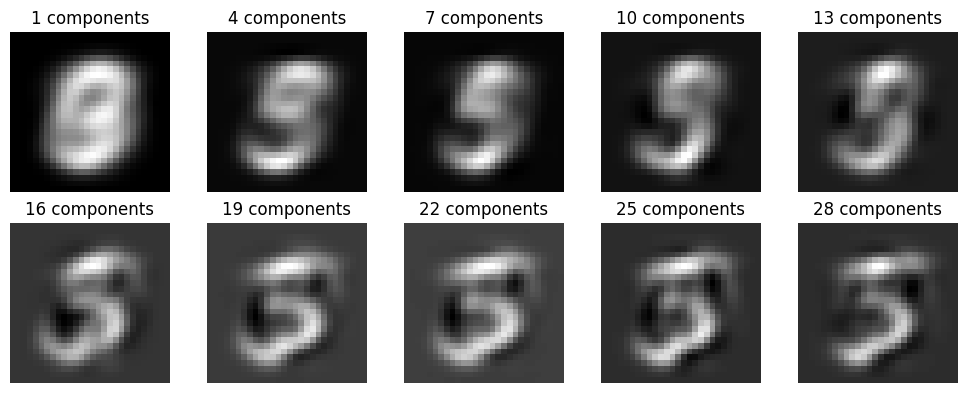

In [39]:
# plot of several PCA reconstructions
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for j, n_c in enumerate(np.arange(1, 30, 3)):
    pca = PCA(n_components=n_c)
    pca.fit(images.reshape(-1, 28 * 28))
    im_pca = pca.transform(im.reshape(1, -1))
    im_reconstructed = pca.inverse_transform(im_pca).reshape(28, 28)
    axes[j // 5, j % 5].imshow(im_reconstructed, cmap='gray')
    axes[j // 5, j % 5].axis('off')
    axes[j // 5, j % 5].set_title(f'{n_c} components')
plt.tight_layout()
plt.show()